In [2]:
#TITLE: Fresno Ag

#SUMMARY: The following code focuses on agriculture in one of California's most productive
#agricultural region, Fresno County. It uses crop mapping data from the California
#Department of Water Resources. The first year of data collection is 2014 and the latest year
#is 2019. It first focuses on California as a State before moving to Fresno County specifically. 
#if there are any questions or concerns, feel free to email Matt Woolf at mattcharleswoolf@gmail.com.

#Import necessary packages

#Allows for reading of geospatial data
import geopandas as gpd
#Allows for interesting visualizations
import matplotlib
#Allows for mathematical operations
import numpy as np
#Allows for plotting
import matplotlib.pyplot as plt
#Allows for creation of GIFs
import imageio
#Reads csv file
import pandas as pd
#For geo tiles
import contextily as cx
#For tile chart
import squarify
#Seaborn for better visuals
import seaborn as sns
sns.set()


In [3]:
#Reading the 2014 data
df2014 = gpd.read_file('/Users/MattWoolf/Desktop/CropMapping2014/i15_Crop_Mapping_2014.shx')

#Getting count of unique values
#df2014['Crop2014'].value_counts()

In [4]:
#Reading/evaluating the 2019 data
df2019 = gpd.read_file('/Users/MattWoolf/Desktop/CropMapping2019/i15_Crop_Mapping_2019.shx')
df2019.columns

df2019=df2019[(df2019['COUNTY'] != "****")]
#df2019['COUNTY'].value_counts()


In [5]:
#Clearly, the 2014 data is written in crop names (example: "Strawberries") whereas the 
#2019 data is written in crop codes (example: "C" for citrus). In order to standardize
#crop categories, we replace these codes with crop names.

df2019 = df2019.replace({
    'V': 'Grapes',
    'D12':'Almonds',
    'D13':'Walnuts',
    'G6':'Miscellaneous Grain and Hay',
    'C5':'Avocados',
    'P1':'Alfalfa and Alfalfa Mixtures',
    'R1':'Rice',
    'T16':'Flowers, Nursery and Christmas Tree Farms',
    'D14':'Pistachios',
    'D5':'Peaches/Nectarines',
    'P6':'Miscellaneous Grasses',
    'T4':'Cole Crops',
    'C6':'Olives',
    'T15':'Tomatoes',
    'T20':'Strawberries',
    'F1':'Cotton',
    'G2':'Wheat',
    'D10':'Miscellaneous Deciduous',
    'T19':'Bush Berries',
    'D3':'Cherries',
    'T9':'Melons, Squash and Cucumbers',
    'U':'Urban',
    'D1':'Apples',
    'T27':'Greenhouse',
    'C4':'Dates',
    'T10':'Onions and Garlic',
    'C7':'Miscellaneous Subtropical Fruits',
    'T6':'Carrots',
    'F12':'Sunflowers',
    'F10':'Beans (Dry)',
    'D15':'Pomegranates',
    'F2':'Safflower',
    'T21':'Peppers',
    'D6':'Pears',
    'R2':'Wild Rice',
    'C8':'Kiwis',
    'C':'Citrus',
    'C10':'Eucalyptus',
    'C2':'Lemons',
    'C3':'Oranges',
    'D':'Deciduous',
    'D16':'Plums, Prunes or Apricots',
    'D8':'Prunes',
    'F11':'Miscellaneous field',
    'F16':'Corn, Sorghum, or Sudan',
    'P':'Pasture',
    'P3':'Mixed pasture',
    'P4':'Native pasture',
    'P7':'Turf farms',
    'T12':'Potatoes',
    'T17':'Mixed (four or more)',
    'T18':'Miscellanous truck',
    'T30':'Lettuce or leafy greens',
    'T31':'Potato or sweet potato',
    'X':'Unclassified fallow',
    'YP':'Young Perrenial'
  }
)

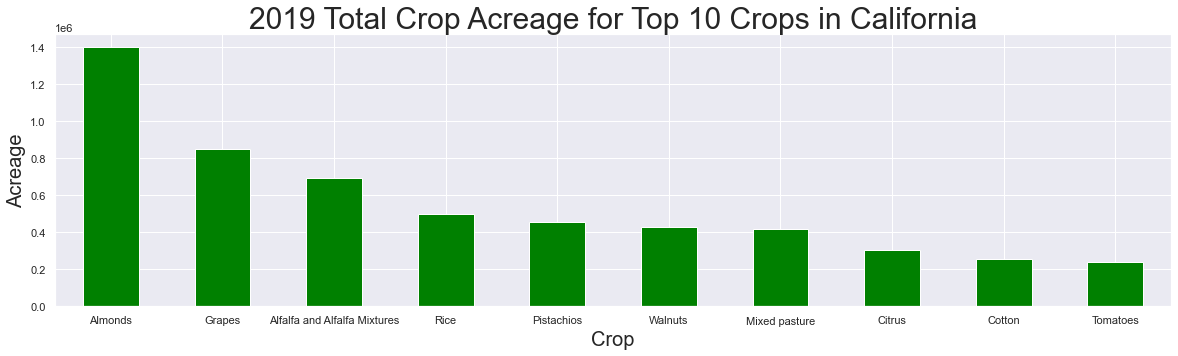

In [8]:
df2019 = df2019[df2019.MAIN_CROP != 'Urban']
df2019 = df2019[df2019.MAIN_CROP != 'Unclassified fallow']
df2019 = df2019[df2019.MAIN_CROP != 'Corn, Sorghum, or Sudan']
df2019 = df2019[df2019.MAIN_CROP != 'Miscellaneous Grain and Hay']

crop_areas2019 = df2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)[:10]
crop_areas2019.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage for Top 10 Crops in California', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec21barchart1.png', dpi=100, bbox_inches = "tight")

In [106]:
df2019.columns

Index(['OBJECTID', 'UniqueID', 'DWR_REVISE', 'SYMB_CLASS', 'MULTIUSE',
       'CLASS1', 'SUBCLASS1', 'SPECOND1', 'IRR_TYP1PA', 'IRR_TYP1PB', 'PCNT1',
       'CLASS2', 'SUBCLASS2', 'SPECOND2', 'IRR_TYP2PA', 'IRR_TYP2PB', 'PCNT2',
       'CLASS3', 'SUBCLASS3', 'SPECOND3', 'IRR_TYP3PA', 'IRR_TYP3PB', 'PCNT3',
       'CLASS4', 'SUBCLASS4', 'SPECOND4', 'IRR_TYP4PA', 'IRR_TYP4PB', 'PCNT4',
       'UCF_ATT', 'CROPTYP1', 'ADOY1', 'CROPTYP2', 'ADOY2', 'CROPTYP3',
       'ADOY3', 'CROPTYP4', 'ADOY4', 'EMRG_CROP', 'REGION', 'ACRES', 'COUNTY',
       'LIQ_REPORT', 'MAIN_CROP', 'MAIN_CROP_', 'Shape__Are', 'Shape__Len',
       'geometry', 'Center_point', 'lon', 'lat'],
      dtype='object')

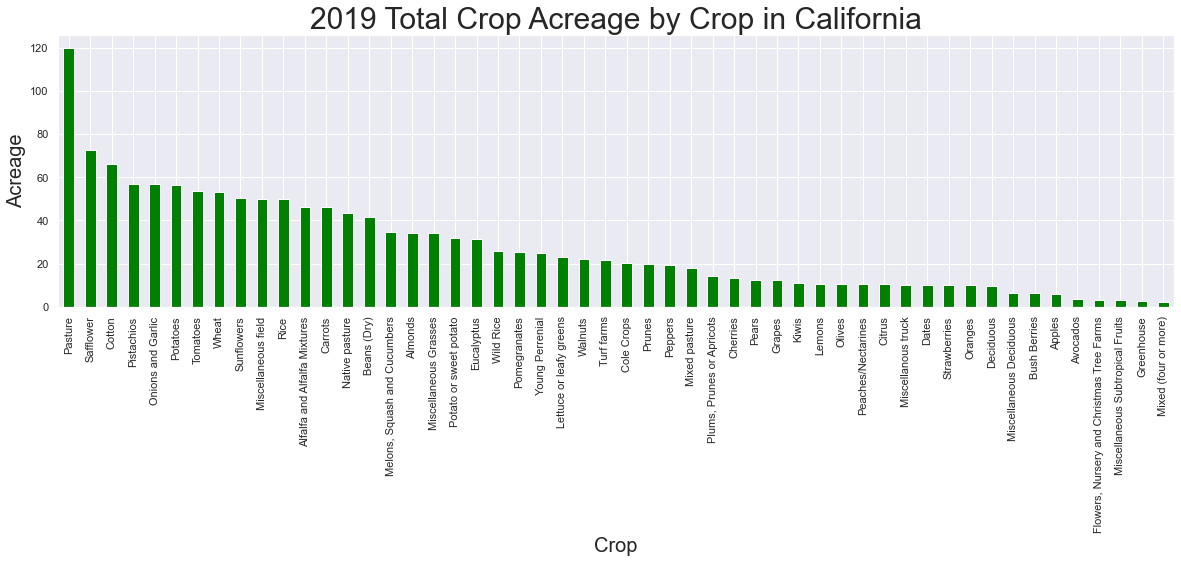

In [95]:
crop_areas2019_bubble = df2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').mean().sort_values('ACRES', ascending=False)
crop_areas2019_bubble.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage by Crop in California', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/Dec21barchart1.png', dpi=100, bbox_inches = "tight")

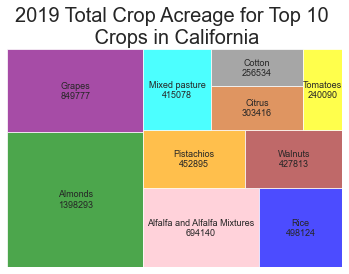

In [112]:
crop_areas2019_truncated = crop_areas2019.head(10)

labels = [f'{crop}\n{acreage}' for crop, acreage in zip(crop_areas2019_truncated.index, (crop_areas2019_truncated.ACRES.astype(int)))]


figsquare = squarify.plot(sizes=crop_areas2019_truncated['ACRES'], label=labels,bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':9},
                         color=['green', 'purple','pink', 'blue', 'orange', 
                               'brown','cyan', 'chocolate', 'grey', 'yellow'])




plt.title('2019 Total Crop Acreage for Top 10 \n Crops in California', fontsize=20)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/tree.png', dpi=100, bbox_inches = "tight")

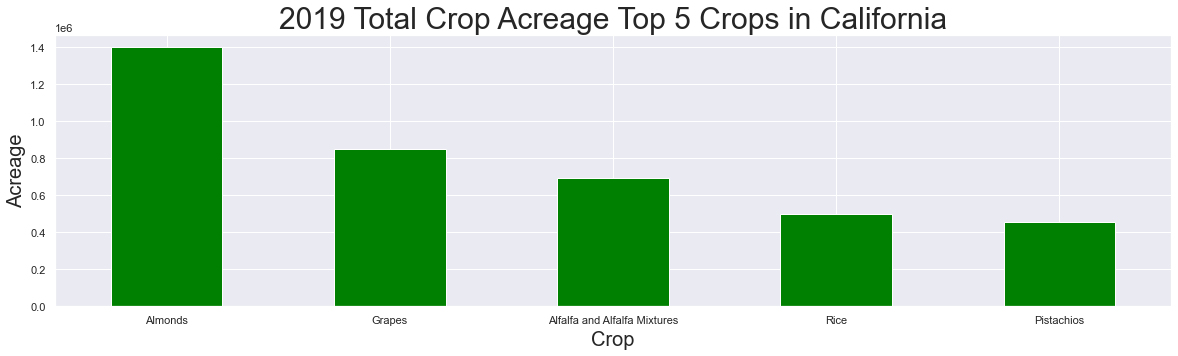

In [349]:
df2019_1=df2019[(df2019['MAIN_CROP'] == "Almonds")|(df2019['MAIN_CROP'] == "Grapes")|
             (df2019['MAIN_CROP'] == 'Alfalfa and Alfalfa Mixtures')|(df2019['MAIN_CROP'] == 'Rice')|
             (df2019['MAIN_CROP'] == 'Pistachios')]

crop_areas2019_1 = df2019_1[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019_1.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage Top 5 Crops in California', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec22barchart1.png', dpi=100, bbox_inches = "tight")

In [366]:
lat1

lat
MAIN_CROP                                 
Alfalfa and Alfalfa Mixtures  4.411599e+06
Almonds                       4.466060e+06
Grapes                        4.436046e+06
Pistachios                    4.333653e+06
Rice                          4.748206e+06

/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

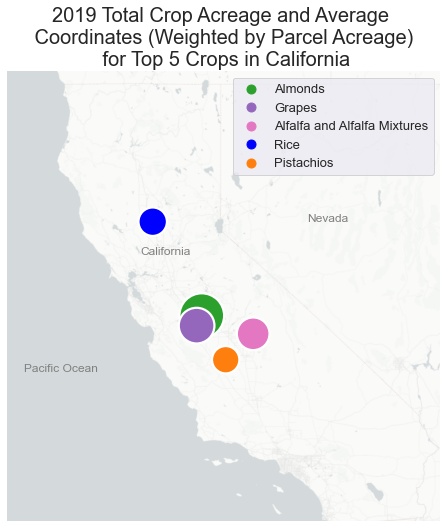

In [440]:
df2019_1['Center_point'] = df2019_1['geometry'].centroid
df2019_1["lon"] = df2019_1.Center_point.map(lambda p: p.x)
df2019_1["lat"] = df2019_1.Center_point.map(lambda p: p.y)


def weighted_average1(df2019_1):
   acre = df2019_1['ACRES']
   lat = df2019_1['lat'] 
   return np.average(lat,weights=acre)

def weighted_average2(df2019_1):
   acre = df2019_1['ACRES']
   lon = df2019_1['lon'] 
   return np.average(lon,weights=acre)

lat = df2019_1[['MAIN_CROP', 'lat', 'ACRES']].groupby('MAIN_CROP').apply(func = weighted_average1).to_frame('lat')
lon = df2019_1[['MAIN_CROP', 'lon', 'ACRES']].groupby('MAIN_CROP').apply(func = weighted_average2).to_frame('lon')

bubbly = pd.concat([crop_areas2019_1, lat, lon], axis=1)

palette = {"Almonds":"tab:green",
           "Pistachios":"tab:orange", 
           "Grapes":"tab:purple",
          "Alfalfa and Alfalfa Mixtures":"tab:pink",
          "Rice":"blue"}

ax = sns.scatterplot(data=bubbly, x="lon", y="lat", size="ACRES", sizes=(750, 2000),
               hue='MAIN_CROP', palette=palette)
ax.set_xlim(-1.4e7,-1.270e7)
ax.set_ylim(3.85e6,5.2e6)
#plt.text(-1.355e7,4.8e6,"Rice")
#plt.text(-1.334e7,4.265e6,"Pistachios")
#plt.text(-1.3355e7,4.5e6,"Alfalfa and \n Alfalfa Mixtures")
#plt.text(-1.3425e7,4.55e6,"Almonds")
#plt.text(-1.345e7,4.32e6,"Grapes")
plt.title('2019 Total Crop Acreage and Average \n Coordinates (Weighted by Parcel Acreage) \n for Top 5 Crops in California', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
cx.add_basemap(ax, source='https://a.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}@2x.png')
plt.ylabel('Latitude', fontsize=15)
plt.axis('off')
#plt.xlim([-1.36e7, -1.32e7])
#plt.ylim([4.3e6, 4.8e6])
plt.text(-1.36e7, 4.65e6, "California", horizontalalignment='left', fontsize=12, color='grey')
plt.text(-1.31e7, 4.75e6, "Nevada", horizontalalignment='left', fontsize=12, color='grey')
plt.text(-1.395e7, 4.3e6, "Pacific Ocean", horizontalalignment='left', fontsize=12, color='grey')
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:6],l[1:6],bbox_to_anchor=(1, 1), fontsize=13)
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('/Users/MattWoolf/Desktop/bubble_1.png', dpi=100, bbox_inches = "tight")


In [429]:
bubble2014

Acres       lat2014       lon2014
Crop2014                                                              
Almonds                       1.127946e+06  4.459781e+06 -1.341341e+07
Alfalfa and Alfalfa Mixtures  9.301311e+05  4.428893e+06 -1.328662e+07
Grapes                        9.045663e+05  4.427534e+06 -1.341869e+07
Rice                          4.514885e+05  4.749055e+06 -1.356159e+07
Pistachios                    3.427694e+05  4.333742e+06 -1.334303e+07

/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

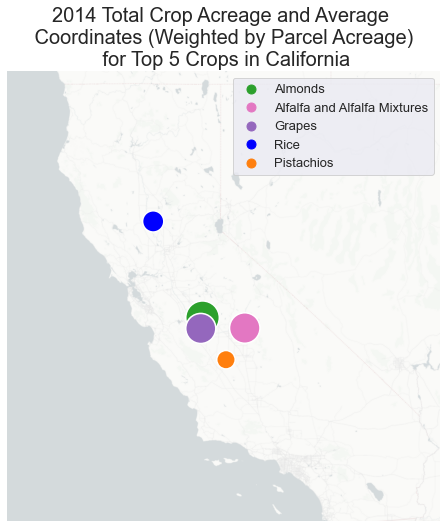

In [431]:
#HERE

df2014_1=df2014[(df2014['Crop2014'] == "Almonds")|(df2014['Crop2014'] == "Grapes")|
             (df2014['Crop2014'] == 'Alfalfa and Alfalfa Mixtures')|(df2014['Crop2014'] == 'Rice')|
             (df2014['Crop2014'] == 'Pistachios')]

crop_areas2014_1 = df2014_1[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)


df2014_1['Center_point2014'] = df2014_1['geometry'].centroid
df2014_1["lon2014"] = df2014_1.Center_point2014.map(lambda p: p.x)
df2014_1["lat2014"] = df2014_1.Center_point2014.map(lambda p: p.y)

def weighted_average3(df2014_1):
   acre2014 = df2014_1['Acres']
   lat2014 = df2014_1['lat2014'] 
   return np.average(lat2014,weights=acre2014)

def weighted_average4(df2014_1):
   acre2014 = df2014_1['Acres']
   lon2014 = df2014_1['lon2014'] 
   return np.average(lon2014,weights=acre2014)

lat2014 = df2014_1[['Crop2014', 'lat2014', 'Acres']].groupby('Crop2014').apply(func = weighted_average3).to_frame('lat2014')
lon2014 = df2014_1[['Crop2014', 'lon2014', 'Acres']].groupby('Crop2014').apply(func = weighted_average4).to_frame('lon2014')


bubble2014 = pd.concat([crop_areas2014_1,lat2014, lon2014], axis=1)


palette = {"Almonds":"tab:green",
           "Pistachios":"tab:orange", 
           "Grapes":"tab:purple",
          "Alfalfa and Alfalfa Mixtures":"tab:pink",
          "Rice":"blue"}

ax=sns.scatterplot(data=bubble2014, x="lon2014", y="lat2014", size="Acres", sizes=(3.427694*100, 11.27946*100),
               hue='Crop2014', palette=palette)
ax.set_xlim(-1.4e7,-1.270e7)
ax.set_ylim(3.85e6,5.2e6)
#plt.text(-1.355e7,4.8e6,"Rice")
#plt.text(-1.334e7,4.265e6,"Pistachios")
#plt.text(-1.3355e7,4.5e6,"Alfalfa and \n Alfalfa Mixtures")
#plt.text(-1.3425e7,4.55e6,"Almonds")
#plt.text(-1.345e7,4.32e6,"Grapes")
plt.title('2014 Total Crop Acreage and Average \n Coordinates (Weighted by Parcel Acreage) \n for Top 5 Crops in California', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
cx.add_basemap(ax, source='https://a.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}@2x.png')
plt.ylabel('Latitude', fontsize=15)
plt.axis('off')
#plt.xlim([-1.36e7, -1.32e7])
#plt.ylim([4.3e6, 4.8e6])
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:6],l[1:6],bbox_to_anchor=(1, 1), fontsize=13)
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('/Users/MattWoolf/Desktop/bubble_2014.png', dpi=100, bbox_inches = "tight")

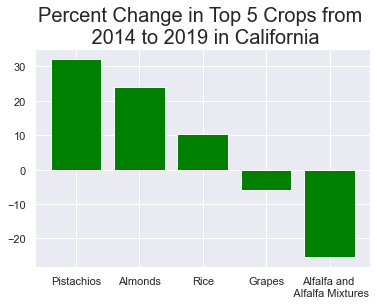

In [250]:
df2019_almonds = df2019[df2019.MAIN_CROP == 'Almonds']
df2014_almonds = df2014[df2014.Crop2014 == 'Almonds']
total_almond_acreage_2014 = df2014_almonds[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_almond_acreage_2019 = df2019_almonds[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_almonds=100*(total_almond_acreage_2019['ACRES'].astype(int)-total_almond_acreage_2014['Acres'].astype(int))/total_almond_acreage_2014['Acres'].astype(int)
percent_change_almonds['Almonds'].astype(int)
total_almond_acreage_2014 = df2014_almonds[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_almond_acreage_2019 = df2019_almonds[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_almonds=100*(total_almond_acreage_2019['ACRES'].astype(int)-total_almond_acreage_2014['Acres'].astype(int))/total_almond_acreage_2014['Acres'].astype(int)
percent_change_almonds['Almonds'].astype(int)


df2019_grapes = df2019[df2019.MAIN_CROP == 'Grapes']
df2014_grapes = df2014[df2014.Crop2014 == 'Grapes']
total_grapes_acreage_2014 = df2014_grapes[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_grapes_acreage_2019 = df2019_grapes[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_grapes=100*(total_grapes_acreage_2019['ACRES'].astype(int)-total_grapes_acreage_2014['Acres'].astype(int))/total_grapes_acreage_2014['Acres'].astype(int)
percent_change_grapes['Grapes'].astype(int)
total_grapes_acreage_2014 = df2014_grapes[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_grapes_acreage_2019 = df2019_grapes[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_grapes=100*(total_grapes_acreage_2019['ACRES'].astype(int)-total_grapes_acreage_2014['Acres'].astype(int))/total_grapes_acreage_2014['Acres'].astype(int)
percent_change_grapes['Grapes'].astype(int)

df2019_alfalfa = df2019[df2019.MAIN_CROP == 'Alfalfa and Alfalfa Mixtures']
df2014_alfalfa = df2014[df2014.Crop2014 == 'Alfalfa and Alfalfa Mixtures']
total_alfalfa_acreage_2014 = df2014_alfalfa[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_alfalfa_acreage_2019 = df2019_alfalfa[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_alfalfa=100*(total_alfalfa_acreage_2019['ACRES'].astype(int)-total_alfalfa_acreage_2014['Acres'].astype(int))/total_alfalfa_acreage_2014['Acres'].astype(int)
percent_change_alfalfa['Alfalfa and Alfalfa Mixtures'].astype(int)
total_alfalfa_acreage_2014 = df2014_alfalfa[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_alfalfa_acreage_2019 = df2019_alfalfa[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_alfalfa=100*(total_alfalfa_acreage_2019['ACRES'].astype(int)-total_alfalfa_acreage_2014['Acres'].astype(int))/total_alfalfa_acreage_2014['Acres'].astype(int)
percent_change_alfalfa['Alfalfa and Alfalfa Mixtures'].astype(int)


df2019_rice = df2019[df2019.MAIN_CROP == 'Rice']
df2014_rice = df2014[df2014.Crop2014 == 'Rice']
total_rice_acreage_2014 = df2014_rice[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_rice_acreage_2019 = df2019_rice[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_rice=100*(total_rice_acreage_2019['ACRES'].astype(int)-total_rice_acreage_2014['Acres'].astype(int))/total_rice_acreage_2014['Acres'].astype(int)
percent_change_rice['Rice'].astype(int)
total_rice_acreage_2014 = df2014_rice[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_rice_acreage_2019 = df2019_rice[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_rice=100*(total_rice_acreage_2019['ACRES'].astype(int)-total_rice_acreage_2014['Acres'].astype(int))/total_rice_acreage_2014['Acres'].astype(int)
percent_change_rice['Rice'].astype(int)

df2019_pistachios = df2019[df2019.MAIN_CROP == 'Pistachios']
df2014_pistachios = df2014[df2014.Crop2014 == 'Pistachios']
total_pistachios_acreage_2014 = df2014_pistachios[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_pistachios_acreage_2019 = df2019_pistachios[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_pistachios=100*(total_pistachios_acreage_2019['ACRES'].astype(int)-total_pistachios_acreage_2014['Acres'].astype(int))/total_pistachios_acreage_2014['Acres'].astype(int)
percent_change_pistachios['Pistachios'].astype(int)
total_pistachios_acreage_2014 = df2014_pistachios[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_pistachios_acreage_2019 = df2019_pistachios[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_pistachios=100*(total_pistachios_acreage_2019['ACRES'].astype(int)-total_pistachios_acreage_2014['Acres'].astype(int))/total_pistachios_acreage_2014['Acres'].astype(int)
percent_change_pistachios['Pistachios'].astype(int)


plt.bar('Pistachios', percent_change_pistachios, color='green')
plt.bar('Almonds', percent_change_almonds, color='green')
plt.bar('Rice', percent_change_rice, color='green')
plt.bar('Grapes', percent_change_grapes, color='green')
plt.bar('Alfalfa and \n Alfalfa Mixtures', percent_change_alfalfa, color='green')
plt.title('Percent Change in Top 5 Crops from \n 2014 to 2019 in California', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentagechanges.png', dpi=100, bbox_inches = "tight")
plt.show()



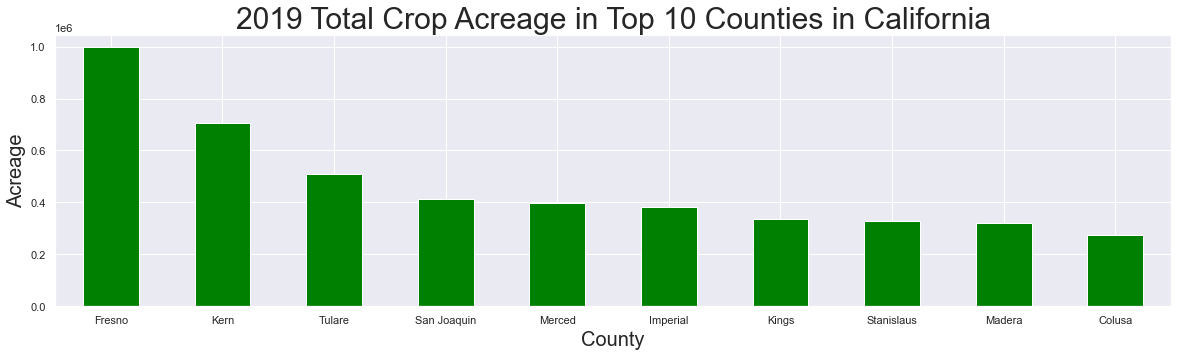

In [11]:
#Create 2019 barchart for California by County
df2019 = df2019[df2019.MAIN_CROP != 'Urban']
df2019_2 = df2019[['COUNTY','ACRES']].groupby('COUNTY').sum().sort_values('ACRES', ascending=False)[:10]
df2019_2.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage in Top 10 Counties in California', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec20barchart1.png', dpi=100, bbox_inches = "tight")

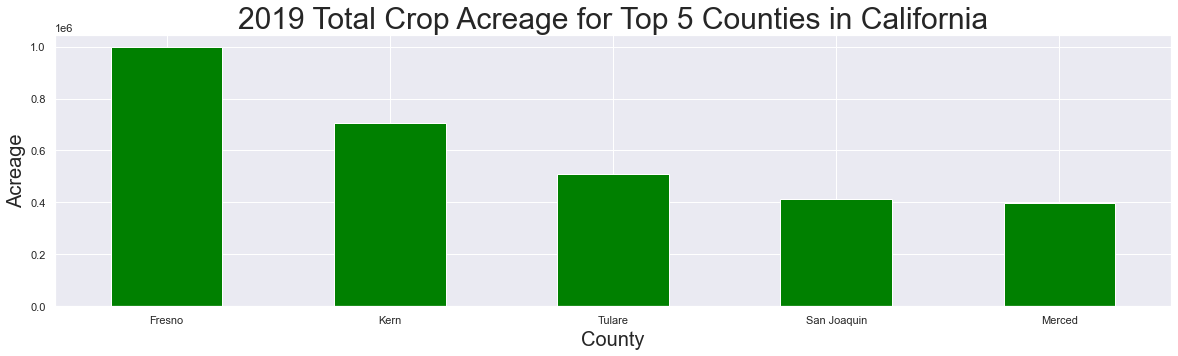

In [115]:
#Create 2019 barchart for Top 5 Counties in California by County
df2019_3=df2019[(df2019['COUNTY'] == "Fresno")|(df2019['COUNTY'] == "Kern")|
             (df2019['COUNTY'] == 'Tulare')|(df2019['COUNTY'] == 'Merced')|
             (df2019['COUNTY'] == 'San Joaquin')]

df2019_4 = df2019_3[['COUNTY','ACRES']].groupby('COUNTY').sum().sort_values('ACRES', ascending=False)
df2019_4.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage for Top 5 Counties in California', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec22barchart2.png', dpi=100, bbox_inches = "tight")

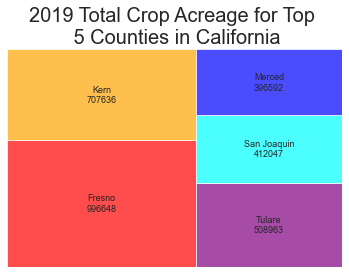

In [116]:
labels = [f'{crop}\n{acreage}' for crop, acreage in zip(df2019_4.index, (df2019_4.ACRES.astype(int)))]


squarify.plot(sizes=df2019_4['ACRES'], label=labels,bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':9},
                         color = ['red', 'orange', 'purple','cyan', 'blue'])



plt.title('2019 Total Crop Acreage for Top \n 5 Counties in California', fontsize=20)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/tree.png', dpi=100, bbox_inches = "tight")

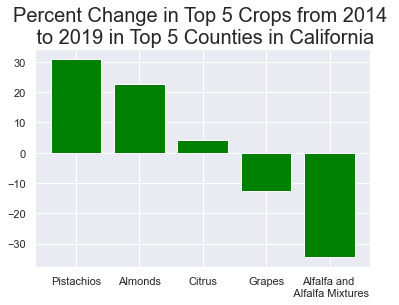

In [249]:
#NEWEST

df2014 = df2014[df2014.Crop2014 != 'Urban']
df2014_county=df2014[(df2014['County'] == "Fresno")|(df2014['County'] == "Kern")|
             (df2014['County'] == 'Tulare')|(df2014['County'] == 'Merced')|
             (df2014['County'] == 'San Joaquin')]

df2019 = df2019[df2019.MAIN_CROP != 'Urban']
df2019_county=df2019[(df2019['COUNTY'] == "Fresno")|(df2019['COUNTY'] == "Kern")|
             (df2019['COUNTY'] == 'Tulare')|(df2019['COUNTY'] == 'Merced')|
             (df2019['COUNTY'] == 'San Joaquin')]

df2019_almonds_c = df2019_county[df2019_county.MAIN_CROP == 'Almonds']
df2014_almonds_c = df2014_county[df2014_county.Crop2014 == 'Almonds']
total_almond_acreage_2014_c = df2014_almonds_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_almond_acreage_2019_c = df2019_almonds_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_almonds_c=100*(total_almond_acreage_2019_c['ACRES'].astype(int)-total_almond_acreage_2014_c['Acres'].astype(int))/total_almond_acreage_2014_c['Acres'].astype(int)
percent_change_almonds_c['Almonds'].astype(int)
total_almond_acreage_2014_c = df2014_almonds_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_almond_acreage_2019_c = df2019_almonds_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_almonds_c=100*(total_almond_acreage_2019_c['ACRES'].astype(int)-total_almond_acreage_2014_c['Acres'].astype(int))/total_almond_acreage_2014_c['Acres'].astype(int)
percent_change_almonds_c['Almonds'].astype(int)


df2019_grapes_c = df2019_county[df2019_county.MAIN_CROP == 'Grapes']
df2014_grapes_c = df2014_county[df2014_county.Crop2014 == 'Grapes']
total_grapes_acreage_2014_c = df2014_grapes_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_grapes_acreage_2019_c = df2019_grapes_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_grapes_c=100*(total_grapes_acreage_2019_c['ACRES'].astype(int)-total_grapes_acreage_2014_c['Acres'].astype(int))/total_grapes_acreage_2014_c['Acres'].astype(int)
percent_change_grapes_c['Grapes'].astype(int)
total_grapes_acreage_2014_c = df2014_grapes_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_grapes_acreage_2019_c = df2019_grapes_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_grapes_c=100*(total_grapes_acreage_2019_c['ACRES'].astype(int)-total_grapes_acreage_2014_c['Acres'].astype(int))/total_grapes_acreage_2014_c['Acres'].astype(int)
percent_change_grapes_c['Grapes'].astype(int)

df2019_alfalfa_c = df2019_county[df2019_county.MAIN_CROP == 'Alfalfa and Alfalfa Mixtures']
df2014_alfalfa_c = df2014_county[df2014_county.Crop2014 == 'Alfalfa and Alfalfa Mixtures']
total_alfalfa_acreage_2014_c = df2014_alfalfa_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_alfalfa_acreage_2019_c = df2019_alfalfa_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_alfalfa_c=100*(total_alfalfa_acreage_2019_c['ACRES'].astype(int)-total_alfalfa_acreage_2014_c['Acres'].astype(int))/total_alfalfa_acreage_2014_c['Acres'].astype(int)
percent_change_alfalfa_c['Alfalfa and Alfalfa Mixtures'].astype(int)
total_alfalfa_acreage_2014_c = df2014_alfalfa_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_alfalfa_acreage_2019_c = df2019_alfalfa_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_alfalfa_c=100*(total_alfalfa_acreage_2019_c['ACRES'].astype(int)-total_alfalfa_acreage_2014_c['Acres'].astype(int))/total_alfalfa_acreage_2014_c['Acres'].astype(int)
percent_change_alfalfa_c['Alfalfa and Alfalfa Mixtures'].astype(int)


df2019_citrus_c = df2019_county[df2019_county.MAIN_CROP == 'Citrus']
df2014_citrus_c = df2014_county[df2014_county.Crop2014 == 'Citrus']
total_citrus_acreage_2014_c = df2014_citrus_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_citrus_acreage_2019_c = df2019_citrus_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_citrus_c=100*(total_citrus_acreage_2019_c['ACRES'].astype(int)-total_citrus_acreage_2014_c['Acres'].astype(int))/total_citrus_acreage_2014_c['Acres'].astype(int)
percent_change_citrus_c['Citrus'].astype(int)
total_citrus_acreage_2014_c = df2014_citrus_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_citrus_acreage_2019_c = df2019_citrus_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_citrus_c=100*(total_citrus_acreage_2019_c['ACRES'].astype(int)-total_citrus_acreage_2014_c['Acres'].astype(int))/total_citrus_acreage_2014_c['Acres'].astype(int)
percent_change_citrus_c['Citrus'].astype(int)

df2019_pistachios_c = df2019_county[df2019_county.MAIN_CROP == 'Pistachios']
df2014_pistachios_c = df2014_county[df2014_county.Crop2014 == 'Pistachios']
total_pistachios_acreage_2014_c = df2014_pistachios_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_pistachios_acreage_2019_c = df2019_pistachios_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_pistachios_c=100*(total_pistachios_acreage_2019_c['ACRES'].astype(int)-total_pistachios_acreage_2014_c['Acres'].astype(int))/total_pistachios_acreage_2014_c['Acres'].astype(int)
percent_change_pistachios_c['Pistachios'].astype(int)
total_pistachios_acreage_2014_c = df2014_pistachios_c[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_pistachios_acreage_2019_c = df2019_pistachios_c[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_pistachios_c=100*(total_pistachios_acreage_2019_c['ACRES'].astype(int)-total_pistachios_acreage_2014_c['Acres'].astype(int))/total_pistachios_acreage_2014_c['Acres'].astype(int)
percent_change_pistachios_c['Pistachios'].astype(int)

plt.bar('Pistachios', percent_change_pistachios_c, color='green')
plt.bar('Almonds', percent_change_almonds_c, color='green')
plt.bar('Citrus', percent_change_citrus_c, color='green')
plt.bar('Grapes', percent_change_grapes_c, color='green')
plt.bar('Alfalfa and \n Alfalfa Mixtures', percent_change_alfalfa_c, color='green')
plt.title('Percent Change in Top 5 Crops from 2014 \n to 2019 in Top 5 Counties in California', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentagechanges.png', dpi=100, bbox_inches = "tight")
plt.show()

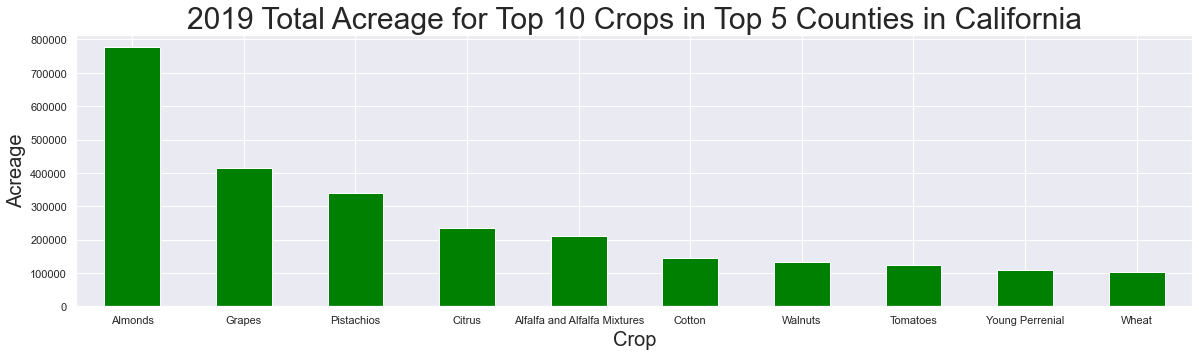

In [12]:
df2019 = df2019[df2019.MAIN_CROP != 'Urban']
df2019_5=df2019[(df2019['COUNTY'] == "Fresno")|(df2019['COUNTY'] == "Kern")|
             (df2019['COUNTY'] == 'Tulare')|(df2019['COUNTY'] == 'Merced')|
             (df2019['COUNTY'] == 'San Joaquin')]

crop_areas2019_2 = df2019_5[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)[:10]
crop_areas2019_2.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Acreage for Top 10 Crops in Top 5 Counties in California', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec23barchart1.png', dpi=100, bbox_inches = "tight")

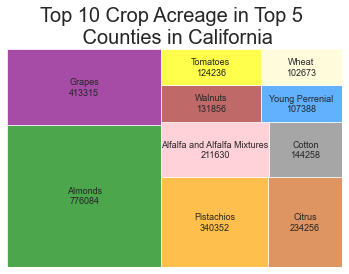

In [117]:
crop_areas2019_truncated_county_2 = crop_areas2019_2.head(10)
crop_areas2019_truncated_county_2

labels = [f'{crop}\n{acreage}' for crop, acreage in zip(crop_areas2019_truncated_county_2.index, (crop_areas2019_truncated_county_2.ACRES.astype(int)))]


squarify.plot(sizes=crop_areas2019_truncated_county_2['ACRES'], label=labels,bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':9},
                         color=['green', 'purple','orange', 'chocolate', 'pink', 
                               'grey','brown', 'yellow', 'dodgerblue', 'lemonchiffon'])

#color=['green', 'purple','pink', 'blue', 'orange', 
 #                              'brown','cyan', 'white', 'grey', 'yellow'])


plt.title('Top 10 Crop Acreage in Top 5 \n Counties in California', fontsize=20)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/tree2.png', dpi=100, bbox_inches = "tight")

/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


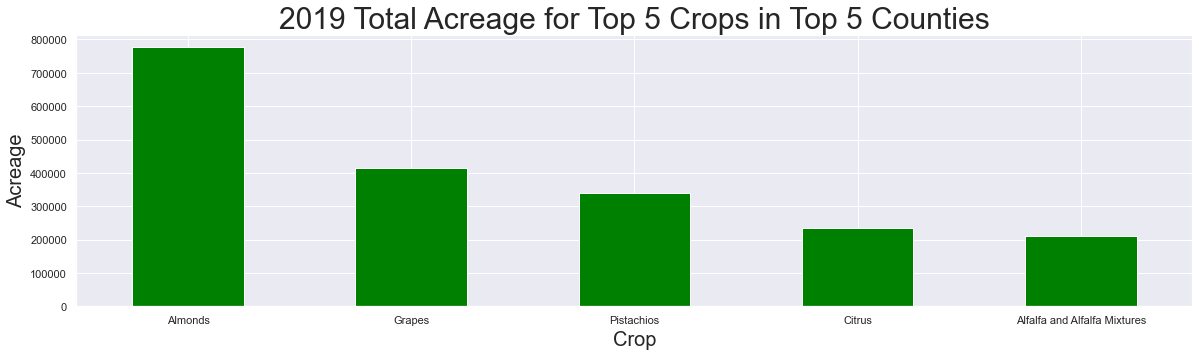

In [119]:
df2019_6=df2019_5[(df2019['MAIN_CROP'] == "Almonds")|(df2019['MAIN_CROP'] == "Grapes")|
             (df2019['MAIN_CROP'] == 'Pistachios')|(df2019['MAIN_CROP'] == 'Citrus')|
             (df2019['MAIN_CROP'] == 'Alfalfa and Alfalfa Mixtures')]

crop_areas2019_3 = df2019_6[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019_3.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Acreage for Top 5 Crops in Top 5 Counties', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec20barchart2.png', dpi=100, bbox_inches = "tight")

In [139]:
crop_areas2019_3

ACRES
MAIN_CROP                                  
Almonds                       776084.123539
Grapes                        413315.633654
Pistachios                    340352.945222
Citrus                        234256.918082
Alfalfa and Alfalfa Mixtures  211630.194697

/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

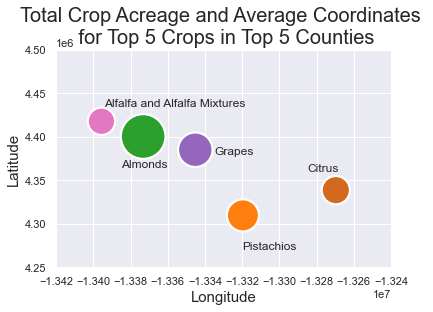

In [247]:
df2019_6['Center_point'] = df2019_6['geometry'].centroid
df2019_6["lon"] = df2019_6.Center_point.map(lambda p: p.x)
df2019_6["lat"] = df2019_6.Center_point.map(lambda p: p.y)

lat = df2019_6[['MAIN_CROP', 'lat']].groupby('MAIN_CROP').mean().sort_values('lat', ascending=False)
lon = df2019_6[['MAIN_CROP', 'lon']].groupby('MAIN_CROP').mean().sort_values('lon', ascending=False)

bubble = pd.concat([crop_areas2019_3,lat, lon], axis=1)

palette = {"Almonds":"tab:green",
           "Pistachios":"tab:orange", 
           "Grapes":"tab:purple",
          "Alfalfa and Alfalfa Mixtures":"tab:pink",
          "Citrus":"chocolate"}

sns.scatterplot(data=bubble, x="lon", y="lat", size="ACRES", legend=False, sizes=(750, 2000),
               hue='MAIN_CROP', palette=palette)
plt.text(-1.33945e7,4.435e6,"Alfalfa and Alfalfa Mixtures")
plt.text(-1.332e7,4.27e6,"Pistachios")
plt.text(-1.3285e7,4.36e6,"Citrus")
plt.text(-1.3385e7,4.365e6,"Almonds")
plt.text(-1.3335e7,4.38e6,"Grapes")
plt.title('Total Crop Acreage and Average Coordinates \n for Top 5 Crops in Top 5 Counties', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.xlim([-1.342e7, -1.324e7])
plt.ylim([4.25e6, 4.5e6])


plt.savefig('/Users/MattWoolf/Desktop/bubble_2.png', dpi=100, bbox_inches = "tight")

In [176]:
bubble

ACRES           lat           lon
MAIN_CROP                                                              
Almonds                       776084.123539  4.400375e+06 -1.337326e+07
Grapes                        413315.633654  4.385161e+06 -1.334522e+07
Pistachios                    340352.945222  4.309698e+06 -1.331962e+07
Citrus                        234256.918082  4.338705e+06 -1.326967e+07
Alfalfa and Alfalfa Mixtures  211630.194697  4.417880e+06 -1.339566e+07

In [140]:
df2019_6

OBJECTID UniqueID DWR_REVISE SYMB_CLASS MULTIUSE CLASS1 SUBCLASS1  \
96073      96074  3916533          *     Grapes        S     **        **   
96074      96075  3916532          *     Grapes        S     **        **   
96075      96076  3916524          *     Grapes        S     **        **   
96076      96077  3916521          *     Grapes        S     **        **   
96077      96078  3916519          *     Grapes        S     **        **   
...          ...      ...        ...        ...      ...    ...       ...   
409203    409204  3903963          b     Grapes        S     **        **   
409239    409240  3904249          r  Deciduous        S     **        **   
409379    409380  3918242          r  Deciduous        S     **        **   
409386    409387  3917024          r  Deciduous        S     **        **   
409408    409409  3920973          b     Grapes        S     **        **   

       SPECOND1 IRR_TYP1PA IRR_TYP1PB  ...           LIQ_REPORT MAIN_CROP  \
96073         *          *          *  ...  V    **** **** ****    Grapes   
96074         *          *          *  ...  V    **** **** ****    Grapes   
96075         *          *          *  ...  V    **** **** ****    Grapes   
96076         *          *          *  ...  V    **** **** ****    Grapes   
96077         *          *          *  ...  V    **** **** ****    Grapes   
...         ...        ...        ...  ...                  ...       ...   
409203        *          *          *  ...  V    **** **** ****    Grapes   
409239        *          *          *  ...  D12  **** **** ****   Almonds   
409379        *          *          *  ...  D12  **** **** ****   Almonds   
409386        *          *          *  ...  D12  **** **** ****   Almonds   
409408        *          *          *  ...  V    **** **** ****    Grapes   

       MAIN_CROP_     Shape__Are   Shape__Len  \
96073         NaN     916.240297   128.906762   
96074         NaN    1459.285179   203.155958   
96075         NaN    3014.673604   212.037791   
96076         NaN    6559.671085   316.400510   
96077         NaN    2043.034154   192.369750   
...           ...            ...          ...   
409203      -70.0  364757.080114  2560.321547   
409239       20.0   74695.915211  1072.662639   
409379       27.0   63565.233530  1127.813048   
409386       43.0    9637.079920   888.329981   
409408      -70.0  362422.538072  2510.213008   

                                                 geometry  \
96073   POLYGON Z ((-13514251.226 4535259.179 0.000, -...   
96074   POLYGON Z ((-13514203.547 4535372.146 0.000, -...   
96075   POLYGON Z ((-13514147.260 4535219.014 0.000, -...   
96076   POLYGON Z ((-13514334.072 4535395.796 0.000, -...   
96077   POLYGON Z ((-13514302.877 4535256.669 0.000, -...   
...                                                   ...   
409203  POLYGON Z ((-13520147.312 4558054.920 0.000, -...   
409239  POLYGON Z ((-13498465.306 4530302.968 0.000, -...   
409379  POLYGON Z ((-13477676.203 4597555.759 0.000, -...   
409386  POLYGON Z ((-13477945.851 4597335.541 0.000, -...   
409408  POLYGON Z ((-13519823.421 4558057.825 0.000, -...   

                             Center_point          long           lat  \
96073   POINT (-13514270.597 4535271.036) -1.351427e+07  4.535271e+06   
96074   POINT (-13514239.571 4535364.216) -1.351424e+07  4.535364e+06   
96075   POINT (-13514161.634 4535252.299) -1.351416e+07  4.535252e+06   
96076   POINT (-13514338.386 4535346.749) -1.351434e+07  4.535347e+06   
96077   POINT (-13514320.466 4535282.462) -1.351432e+07  4.535282e+06   
...                                   ...           ...           ...   
409203  POINT (-13520368.465 4558456.038) -1.352037e+07  4.558456e+06   
409239  POINT (-13498506.906 4530441.363) -1.349851e+07  4.530441e+06   
409379  POINT (-13477843.047 4597520.033) -1.347784e+07  4.597520e+06   
409386  POINT (-13477830.085 4597406.597) -1.347783e+07  4.597407e+06   
409408  POINT (-13519913.176 4558

In [30]:
#Create color list for plotting
colors = ['red', 'orange', 'blue',
         'cyan', 'purple']

In [98]:
df2019_7=df2019[(df2019['COUNTY'] == "Fresno")|(df2019['COUNTY'] == "Kern")|
             (df2019['COUNTY'] == 'Tulare')|(df2019['COUNTY'] == 'Merced')|
             (df2019['COUNTY'] == 'San Joaquin')]

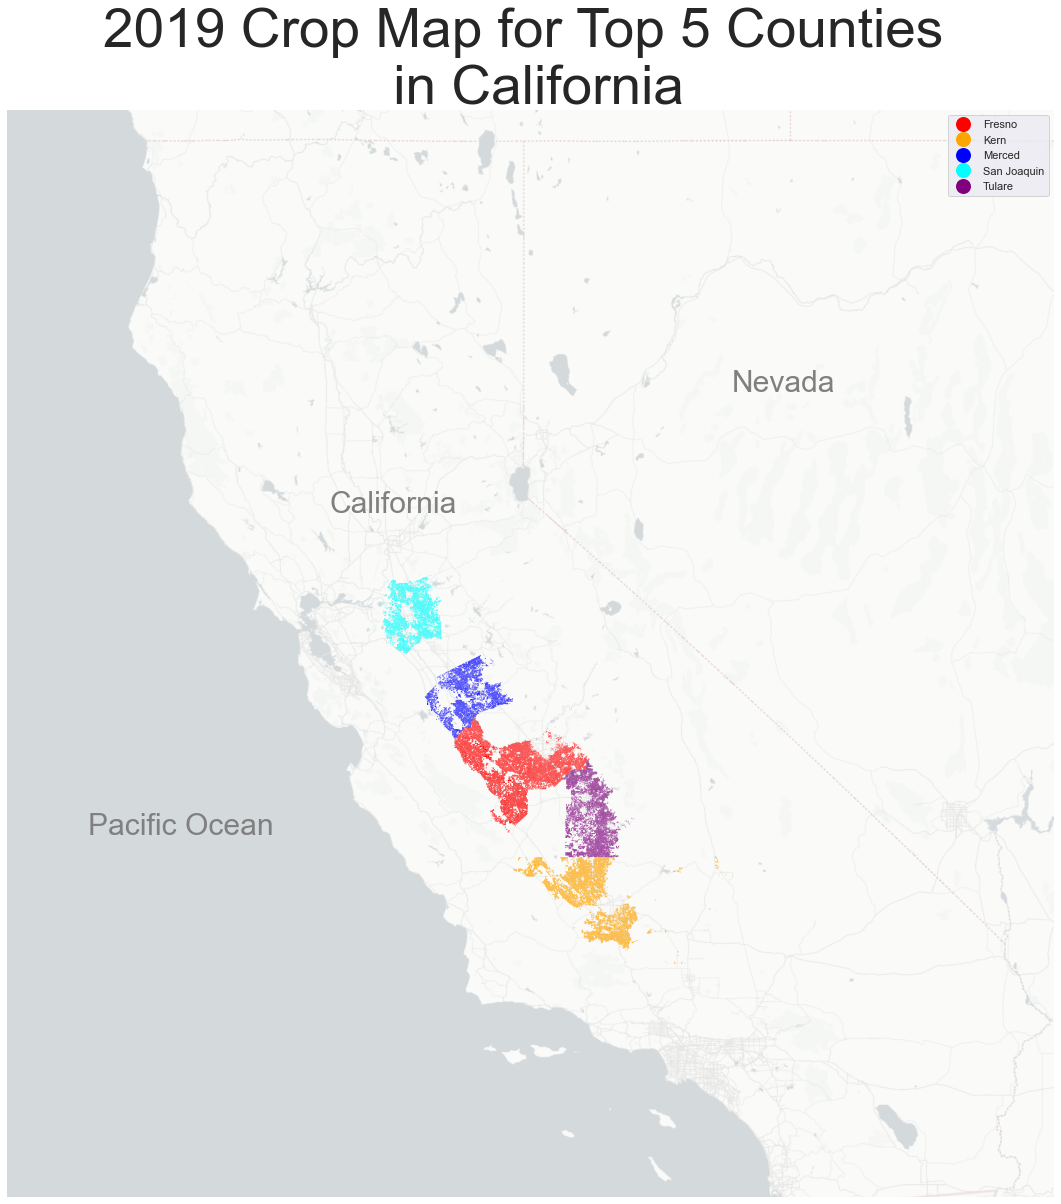

In [99]:
#df2019_7 = df2019_7.to_crs(epsg=3857)

ax = df2019_7.plot(column='COUNTY', categorical=True, legend=True, figsize=(20,20), 
                 cmap=matplotlib.colors.ListedColormap(colors), edgecolor='none')
ax.set_xlim(-1.4e7,-1.270e7)
ax.set_ylim(3.85e6,5.2e6)

cx.add_basemap(ax, source='https://a.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}@2x.png')

#cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.title('2019 Crop Map for Top 5 Counties \n in California', fontsize=55)
plt.text(-1.36e7, 4.7e6, "California", horizontalalignment='left', fontsize=30, color='grey')
plt.text(-1.31e7, 4.85e6, "Nevada", horizontalalignment='left', fontsize=30, color='grey')
plt.text(-1.39e7, 4.3e6, "Pacific Ocean", horizontalalignment='left', fontsize=30, color='grey')
plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/Dec20map.png', dpi=100, bbox_inches = "tight")

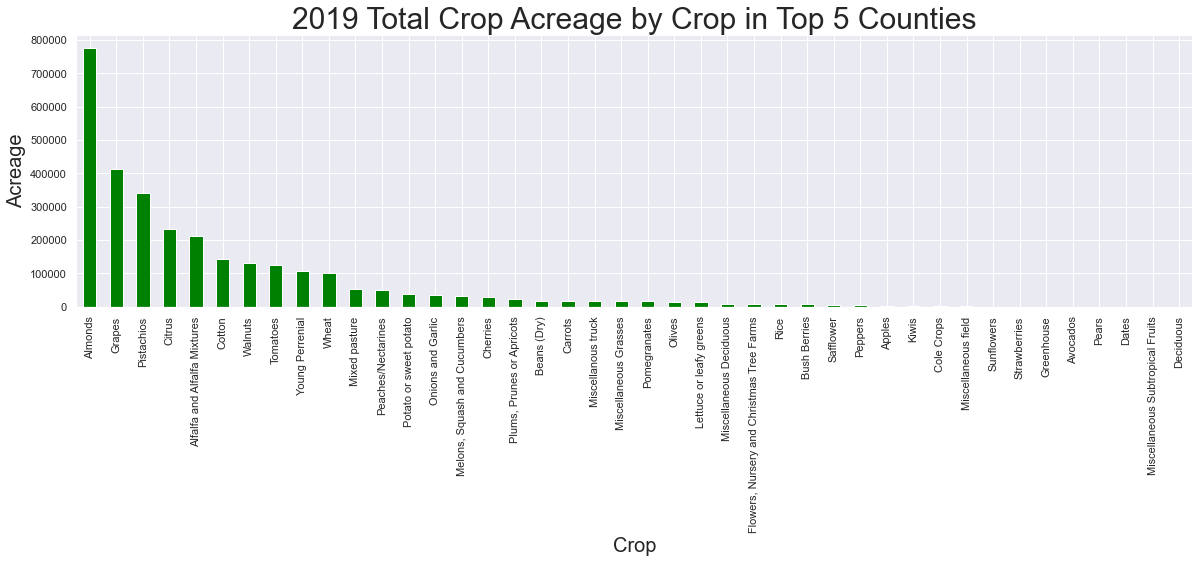

In [33]:
crop_areas2019_4 = df2019_7[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019_4.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage by Crop in Top 5 Counties', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/Dec20barchart2.png', dpi=100, bbox_inches = "tight")

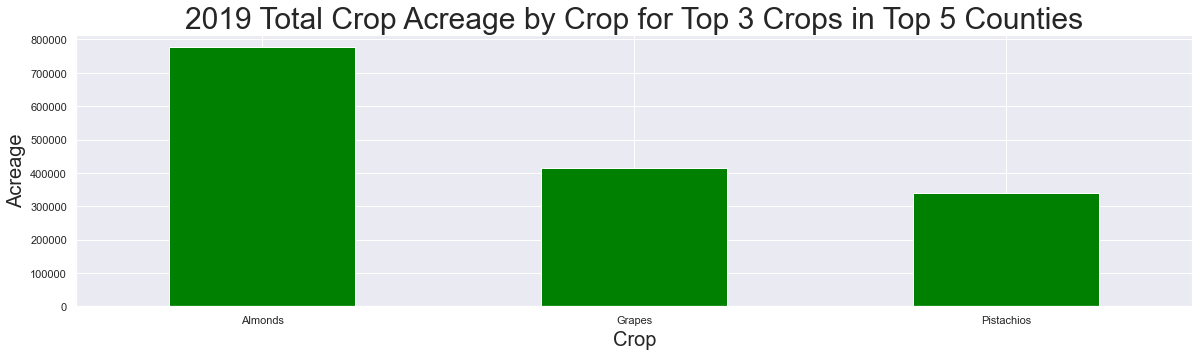

In [100]:
df2019_8 = df2019_7[(df2019_county.MAIN_CROP == 'Almonds')|(df2019_county.MAIN_CROP == 'Grapes')|
                                  (df2019_county.MAIN_CROP == 'Pistachios')]
crop_areas2019_5 = df2019_8[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019_5.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Total Crop Acreage by Crop for Top 3 Crops in Top 5 Counties', fontsize=30)
plt.ylabel('Acreage', fontsize=20)
plt.xlabel('Crop', fontsize=20)
plt.xticks(rotation=0)
plt.savefig('/Users/MattWoolf/Desktop/Dec20barchart2.png', dpi=100, bbox_inches = "tight")

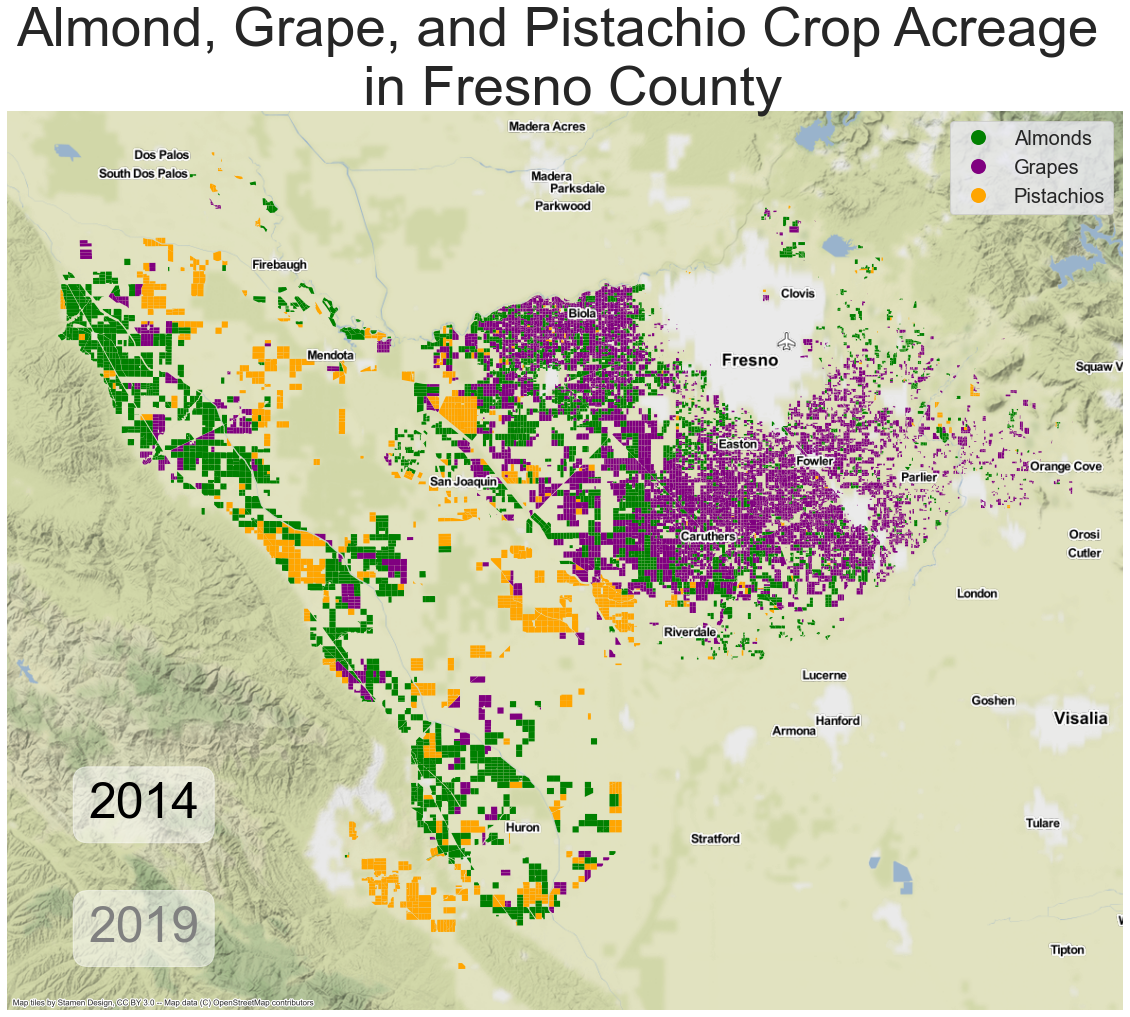

In [102]:
import contextily as cx

colors1 = ['green', 'purple', 'orange']

df_fresno_2014=df2014[(df2014['County'] == "Fresno")]

df_fresno_2014=df_fresno_2014[(df_fresno_2014['Crop2014'] == "Almonds")|(df_fresno_2014['Crop2014'] == 'Pistachios')
                      |(df_fresno_2014['Crop2014'] == 'Grapes')]

df_fresno_2014 = df_fresno_2014.to_crs(epsg=3857)

ax = df_fresno_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.rc('legend', fontsize=20, markerscale=1.5)
plt.title('Almond, Grape, and Pistachio Crop Acreage \n in Fresno County', fontsize=55)
plt.text(-1.344e7, 4.33e6, "2014", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.344e7, 4.31e6, "2019", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.savefig('/Users/MattWoolf/Desktop/fresno2014.png', dpi=100, bbox_inches='tight')

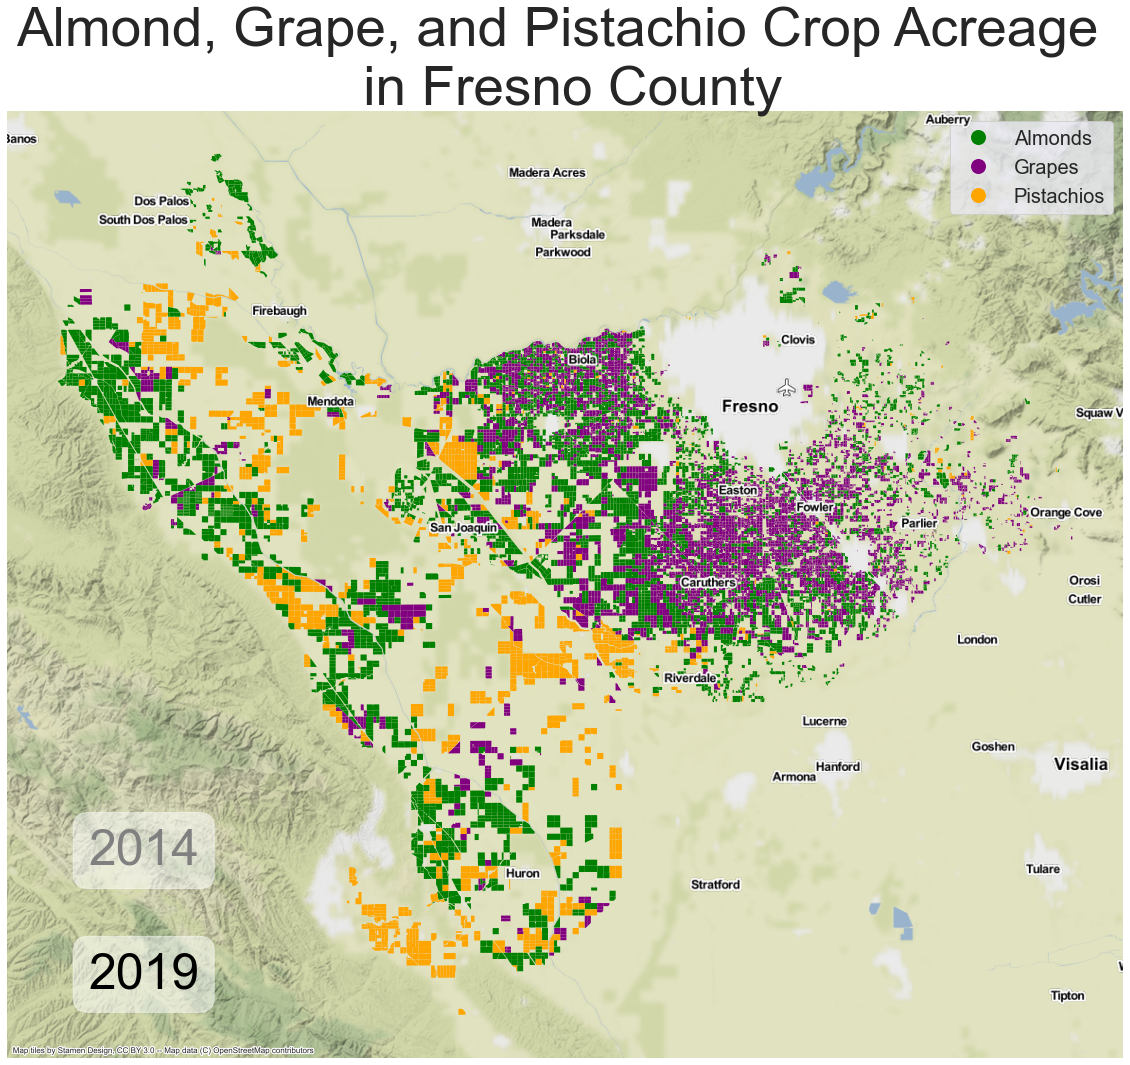

In [103]:
df_fresno_2019=df2019[(df2019['COUNTY'] == "Fresno")]

df_fresno_2019=df_fresno_2019[(df_fresno_2019['MAIN_CROP'] == "Almonds")|(df_fresno_2019['MAIN_CROP'] == 'Pistachios')
                      |(df_fresno_2019['MAIN_CROP'] == 'Grapes')]

df_fresno_2019 = df_fresno_2019.to_crs(epsg=3857)

ax = df_fresno_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.rc('legend', fontsize=20, markerscale=1.5)
plt.title('Almond, Grape, and Pistachio Crop Acreage \n in Fresno County', fontsize=55)
plt.text(-1.344e7, 4.33e6, "2014", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.344e7, 4.31e6, "2019", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.savefig('/Users/MattWoolf/Desktop/fresno2019.png', dpi=100, bbox_inches='tight')

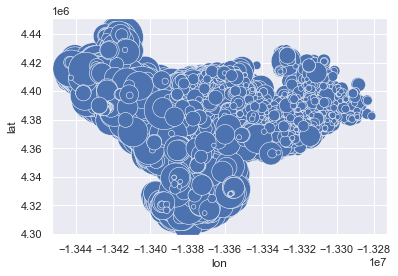

In [133]:
sns.scatterplot(data=df_fresno_2019, x="lon", y="lat", size="ACRES", legend=False, sizes=(20, 2000))
plt.savefig('/Users/MattWoolf/Desktop/bubble.png', dpi=100, bbox_inches = "tight")

In [134]:
df_fresno_2019['MAIN_CROP'].value_counts()

Grapes        6788
Almonds       5870
Pistachios    1610
Name: MAIN_CROP, dtype: int64

In [ ]:
#Create GIF for Fresno...
png_list = ['/Users/MattWoolf/Desktop/fresno2014.png', 
            '/Users/MattWoolf/Desktop/fresno2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/fresno.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

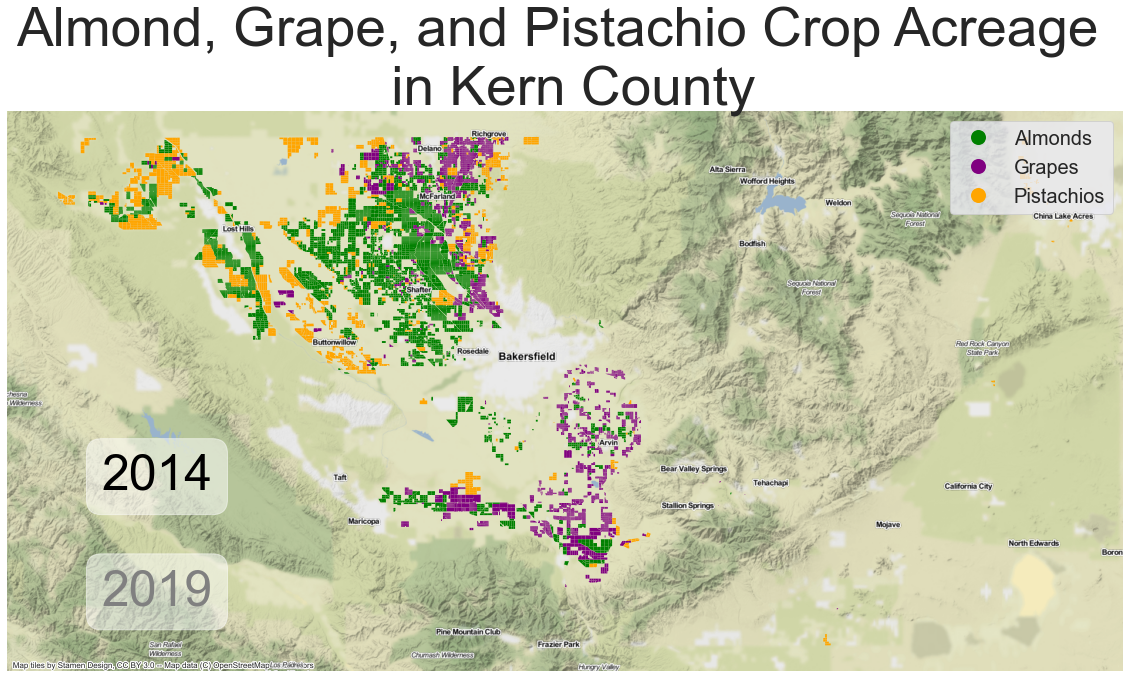

In [135]:
df_kern_2014=df2014[(df2014['County'] == "Kern")]

df_kern_2014=df_kern_2014[(df_kern_2014['Crop2014'] == "Almonds")|(df_kern_2014['Crop2014'] == 'Pistachios')
                      |(df_kern_2014['Crop2014'] == 'Grapes')]

df_kern_2014 = df_kern_2014.to_crs(epsg=3857)

ax = df_kern_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.title('Almond, Grape, and Pistachio Crop Acreage \n in Kern County', fontsize=55)
plt.text(-1.336e7, 4.18e6, "2014", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.336e7, 4.15e6, "2019", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/kern2014.png', dpi=100, bbox_inches='tight')

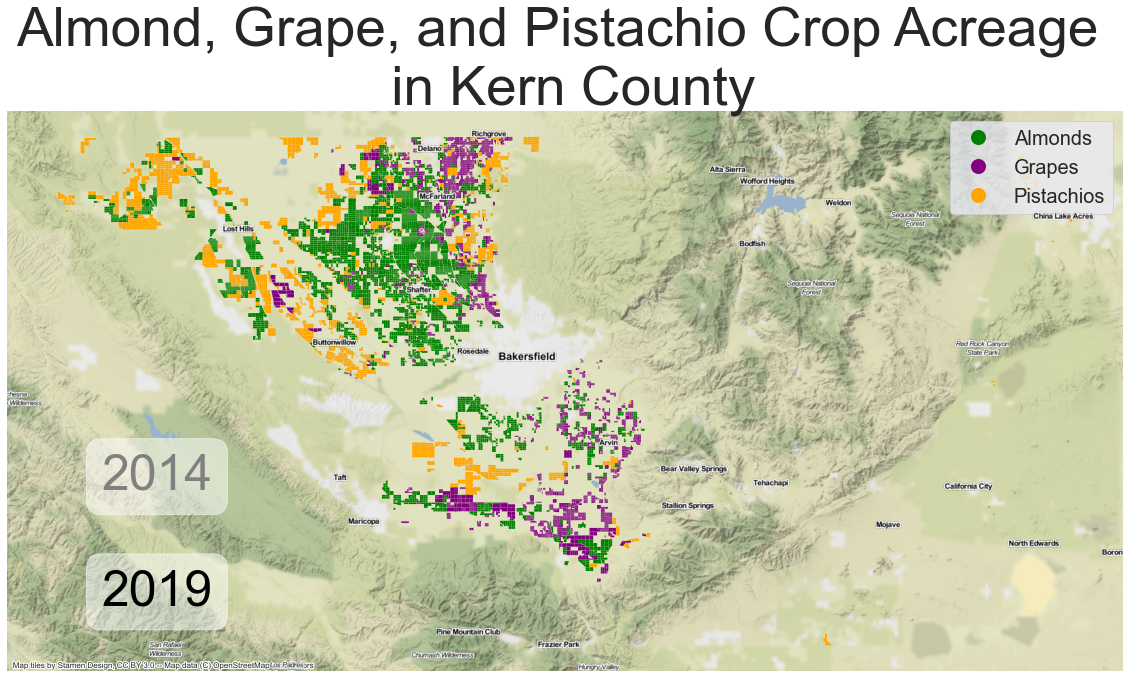

In [136]:
df_kern_2019=df2019[(df2019['COUNTY'] == "Kern")]

df_kern_2019=df_kern_2019[(df_kern_2019['MAIN_CROP'] == "Almonds")|(df_kern_2019['MAIN_CROP'] == 'Pistachios')
                      |(df_kern_2019['MAIN_CROP'] == 'Grapes')]

df_kern_2019 = df_kern_2019.to_crs(epsg=3857)

ax = df_kern_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.text(-1.336e7, 4.18e6, "2014", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.336e7, 4.15e6, "2019", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.rc('legend', fontsize=20, markerscale=1.5)
plt.title('Almond, Grape, and Pistachio Crop Acreage \n in Kern County', fontsize=55)
plt.savefig('/Users/MattWoolf/Desktop/kern2019.png', dpi=100, bbox_inches='tight')

In [ ]:
#Create GIF for Kern...
png_list = ['/Users/MattWoolf/Desktop/kern2014.png', 
            '/Users/MattWoolf/Desktop/kern2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/kern.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
df_tulare_2014=df2014[(df2014['County'] == "Tulare")]

df_tulare_2014=df_tulare_2014[(df_tulare_2014['Crop2014'] == "Almonds")|(df_tulare_2014['Crop2014'] == 'Pistachios')
                      |(df_tulare_2014['Crop2014'] == 'Grapes')]

df_tulare_2014 = df_tulare_2014.to_crs(epsg=3857)

ax = df_tulare_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.title('Almond, Grape, and Pistachio \n Crop Acreage in Tulare County', fontsize=55)
plt.axis('off')

plt.text(-1.3255e7, 4.3725e6, "2014", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.3255e7, 4.36e6, "2019", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.rc('legend', fontsize=20, markerscale=1.5)

plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/tulare2014.png', dpi=100, bbox_inches='tight')

In [ ]:
df_tulare_2019=df2019[(df2019['COUNTY'] == "Tulare")]

df_tulare_2019=df_tulare_2019[(df_tulare_2019['MAIN_CROP'] == "Almonds")|(df_tulare_2019['MAIN_CROP'] == 'Pistachios')
                      |(df_tulare_2019['MAIN_CROP'] == 'Grapes')]

df_tulare_2019 = df_tulare_2019.to_crs(epsg=3857)

ax = df_tulare_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.title('Almond, Grape, and Pistachio \n Crop Acreage in Tulare County', fontsize=55)

plt.text(-1.3255e7, 4.3725e6, "2014", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.3255e7, 4.36e6, "2019", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))

plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/tulare2019.png', dpi=100, bbox_inches='tight')

In [ ]:
#Create GIF for Tulare...
png_list = ['/Users/MattWoolf/Desktop/tulare2014.png', 
            '/Users/MattWoolf/Desktop/tulare2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/tulare.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
colors1 = ['green', 'purple', 'orange']

df_sj_2014=df2014[(df2014['County'] == "San Joaquin")]

df_sj_2014=df_sj_2014[(df_sj_2014['Crop2014'] == "Almonds")|(df_sj_2014['Crop2014'] == 'Pistachios')
                      |(df_sj_2014['Crop2014'] == 'Grapes')]

df_sj_2014 = df_sj_2014.to_crs(epsg=3857)

ax = df_sj_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.title('Almond, Grape, and Pistachio Crop \n Acreage in San Joaquin County', fontsize=55)
plt.axis('off')

plt.text(-1.353e7, 4.62e6, "2014", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.35117e7, 4.62e6, "2019", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))


plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/sj2014.png', dpi=100, bbox_inches='tight')

In [ ]:
colors1 = ['green', 'purple', 'orange']

df_sj_2019=df2019[(df2019['COUNTY'] == "San Joaquin")]

df_sj_2019=df_sj_2019[(df_sj_2019['MAIN_CROP'] == "Almonds")|(df_sj_2019['MAIN_CROP'] == 'Pistachios')
                      |(df_sj_2019['MAIN_CROP'] == 'Grapes')]

df_sj_2019 = df_sj_2019.to_crs(epsg=3857)

ax = df_sj_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.title('Almond, Grape, and Pistachio Crop \n Acreage in San Joaquin County', fontsize=55)

plt.text(-1.353e7, 4.62e6, "2014", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.35117e7, 4.62e6, "2019", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))

plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/sj2019.png', dpi=100, bbox_inches='tight')

In [ ]:
#Create GIF for San Joaquin...
png_list = ['/Users/MattWoolf/Desktop/sj2014.png', 
            '/Users/MattWoolf/Desktop/sj2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/sanjoaquin.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
df_merced_2014=df2014[(df2014['County'] == "Merced")]

df_merced_2014=df_merced_2014[(df_merced_2014['Crop2014'] == "Almonds")|(df_merced_2014['Crop2014'] == 'Pistachios')
                      |(df_merced_2014['Crop2014'] == 'Grapes')]

df_merced_2014 = df_merced_2014.to_crs(epsg=3857)

ax = df_merced_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.title('Almond, Grape, and Pistachio Crop Acreage \n in Merced County', fontsize=55)
plt.axis('off')

plt.text(-1.33825e7, 4.51e6, "2014", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.33825e7, 4.499e6, "2019", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))

plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/merced2014.png', dpi=100, bbox_inches='tight')

In [ ]:
df_merced_2019=df2019[(df2019['COUNTY'] == "Merced")]

df_merced_2019=df_merced_2019[(df_merced_2019['MAIN_CROP'] == "Almonds")|(df_merced_2019['MAIN_CROP'] == 'Pistachios')
                      |(df_merced_2019['MAIN_CROP'] == 'Grapes')]

df_merced_2019 = df_merced_2019.to_crs(epsg=3857)

ax = df_merced_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1), edgecolor='none')
cx.add_basemap(ax, source=cx.providers.Stamen.TerrainBackground)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.title('Almond, Grape, and Pistachio Crop Acreage \n in Merced County', fontsize=55)

plt.text(-1.33825e7, 4.51e6, "2014", horizontalalignment='left', fontsize=50, color='grey',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))
plt.text(-1.33825e7, 4.499e6, "2019", horizontalalignment='left', fontsize=50, color='black',
        bbox=dict(boxstyle="round", color='white', alpha=0.5))

plt.rc('legend', fontsize=20, markerscale=1.5)
plt.savefig('/Users/MattWoolf/Desktop/merced2019.png', dpi=100, bbox_inches='tight')

In [ ]:
#Create GIF for Merced...
png_list = ['/Users/MattWoolf/Desktop/merced2014.png', 
            '/Users/MattWoolf/Desktop/merced2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/merced.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
#ALMONDS

#Fresno
df2019_fresno_alm = df2019[(df2019.MAIN_CROP == 'Almonds')&(df2019.COUNTY == 'Fresno')]
df2014_fresno_alm = df2014[(df2014.Crop2014 == 'Almonds')&(df2014.County == 'Fresno')]
fresno_alm_acreage_2014 = df2014_fresno_alm[['Crop2014', 'Acres']].groupby('Crop2014').sum()
fresno_alm_acreage_2019 = df2019_fresno_alm[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_fresno_alm=100*(fresno_alm_acreage_2019['ACRES'].astype(int)-fresno_alm_acreage_2014['Acres'].astype(int))/fresno_alm_acreage_2014['Acres'].astype(int)
percent_change_fresno_alm['Almonds'].astype(int)

#Kern
df2019_Kern_alm = df2019[(df2019.MAIN_CROP == 'Almonds')&(df2019.COUNTY == 'Kern')]
df2014_Kern_alm = df2014[(df2014.Crop2014 == 'Almonds')&(df2014.County == 'Kern')]
Kern_alm_acreage_2014 = df2014_Kern_alm[['Crop2014', 'Acres']].groupby('Crop2014').sum()
Kern_alm_acreage_2019 = df2019_Kern_alm[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_Kern_alm=100*(Kern_alm_acreage_2019['ACRES'].astype(int)-Kern_alm_acreage_2014['Acres'].astype(int))/Kern_alm_acreage_2014['Acres'].astype(int)
percent_change_Kern_alm['Almonds'].astype(int)


#Tulare
df2019_tulare_alm = df2019[(df2019.MAIN_CROP == 'Almonds')&(df2019.COUNTY == 'Tulare')]
df2014_tulare_alm = df2014[(df2014.Crop2014 == 'Almonds')&(df2014.County == 'Tulare')]
tulare_alm_acreage_2014 = df2014_tulare_alm[['Crop2014', 'Acres']].groupby('Crop2014').sum()
tulare_alm_acreage_2019 = df2019_tulare_alm[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_tulare_alm=100*(tulare_alm_acreage_2019['ACRES'].astype(int)-tulare_alm_acreage_2014['Acres'].astype(int))/tulare_alm_acreage_2014['Acres'].astype(int)
percent_change_tulare_alm['Almonds'].astype(int)

#San Joaquin
df2019_sj_alm = df2019[(df2019.MAIN_CROP == 'Almonds')&(df2019.COUNTY == 'San Joaquin')]
df2014_sj_alm = df2014[(df2014.Crop2014 == 'Almonds')&(df2014.County == 'San Joaquin')]
sj_alm_acreage_2014 = df2014_sj_alm[['Crop2014', 'Acres']].groupby('Crop2014').sum()
sj_alm_acreage_2019 = df2019_sj_alm[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_sj_alm=100*(sj_alm_acreage_2019['ACRES'].astype(int)-sj_alm_acreage_2014['Acres'].astype(int))/sj_alm_acreage_2014['Acres'].astype(int)
percent_change_sj_alm['Almonds'].astype(int)

#Merced
df2019_merced_alm = df2019[(df2019.MAIN_CROP == 'Almonds')&(df2019.COUNTY == 'Merced')]
df2014_merced_alm = df2014[(df2014.Crop2014 == 'Almonds')&(df2014.County == 'Merced')]
merced_alm_acreage_2014 = df2014_merced_alm[['Crop2014', 'Acres']].groupby('Crop2014').sum()
merced_alm_acreage_2019 = df2019_merced_alm[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_merced_alm=100*(merced_alm_acreage_2019['ACRES'].astype(int)-merced_alm_acreage_2014['Acres'].astype(int))/merced_alm_acreage_2014['Acres'].astype(int)
percent_change_merced_alm['Almonds'].astype(int)

In [ ]:
#PISTACHIOS

#Fresno
df2019_fresno_pist = df2019[(df2019.MAIN_CROP == 'Pistachios')&(df2019.COUNTY == 'Fresno')]
df2014_fresno_pist = df2014[(df2014.Crop2014 == 'Pistachios')&(df2014.County == 'Fresno')]
fresno_pist_acreage_2014 = df2014_fresno_pist[['Crop2014', 'Acres']].groupby('Crop2014').sum()
fresno_pist_acreage_2019 = df2019_fresno_pist[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_fresno_pist=100*(fresno_pist_acreage_2019['ACRES'].astype(int)-fresno_pist_acreage_2014['Acres'].astype(int))/fresno_pist_acreage_2014['Acres'].astype(int)
percent_change_fresno_pist['Pistachios'].astype(int)

#Kern
df2019_Kern_pist = df2019[(df2019.MAIN_CROP == 'Pistachios')&(df2019.COUNTY == 'Kern')]
df2014_Kern_pist = df2014[(df2014.Crop2014 == 'Pistachios')&(df2014.County == 'Kern')]
Kern_pist_acreage_2014 = df2014_Kern_pist[['Crop2014', 'Acres']].groupby('Crop2014').sum()
Kern_pist_acreage_2019 = df2019_Kern_pist[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_Kern_pist=100*(Kern_pist_acreage_2019['ACRES'].astype(int)-Kern_pist_acreage_2014['Acres'].astype(int))/Kern_pist_acreage_2014['Acres'].astype(int)
percent_change_Kern_pist['Pistachios'].astype(int)

#Tulare
df2019_tulare_pist = df2019[(df2019.MAIN_CROP == 'Pistachios')&(df2019.COUNTY == 'Tulare')]
df2014_tulare_pist = df2014[(df2014.Crop2014 == 'Pistachios')&(df2014.County == 'Tulare')]
tulare_pist_acreage_2014 = df2014_tulare_pist[['Crop2014', 'Acres']].groupby('Crop2014').sum()
tulare_pist_acreage_2019 = df2019_tulare_pist[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_tulare_pist=100*(tulare_pist_acreage_2019['ACRES'].astype(int)-tulare_pist_acreage_2014['Acres'].astype(int))/tulare_pist_acreage_2014['Acres'].astype(int)
percent_change_tulare_pist['Pistachios'].astype(int)

#San Joaquin
df2019_sj_pist = df2019[(df2019.MAIN_CROP == 'Pistachios')&(df2019.COUNTY == 'San Joaquin')]
df2014_sj_pist = df2014[(df2014.Crop2014 == 'Pistachios')&(df2014.County == 'San Joaquin')]
sj_pist_acreage_2014 = df2014_sj_pist[['Crop2014', 'Acres']].groupby('Crop2014').sum()
sj_pist_acreage_2019 = df2019_sj_pist[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_sj_pist=100*(sj_pist_acreage_2019['ACRES'].astype(int)-sj_pist_acreage_2014['Acres'].astype(int))/sj_pist_acreage_2014['Acres'].astype(int)
percent_change_sj_pist['Pistachios'].astype(int)

#Merced
df2019_merced_pist = df2019[(df2019.MAIN_CROP == 'Pistachios')&(df2019.COUNTY == 'Merced')]
df2014_merced_pist = df2014[(df2014.Crop2014 == 'Pistachios')&(df2014.County == 'Merced')]
merced_pist_acreage_2014 = df2014_merced_pist[['Crop2014', 'Acres']].groupby('Crop2014').sum()
merced_pist_acreage_2019 = df2019_merced_pist[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_merced_pist=100*(merced_pist_acreage_2019['ACRES'].astype(int)-merced_pist_acreage_2014['Acres'].astype(int))/merced_pist_acreage_2014['Acres'].astype(int)
percent_change_merced_pist['Pistachios'].astype(int)

In [ ]:
#Grapes

#Fresno
df2019_fresno_grape = df2019[(df2019.MAIN_CROP == 'Grapes')&(df2019.COUNTY == 'Fresno')]
df2014_fresno_grape= df2014[(df2014.Crop2014 == 'Grapes')&(df2014.County == 'Fresno')]
fresno_grape_acreage_2014 = df2014_fresno_grape[['Crop2014', 'Acres']].groupby('Crop2014').sum()
fresno_grape_acreage_2019 = df2019_fresno_grape[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_fresno_grape=100*(fresno_grape_acreage_2019['ACRES'].astype(int)-fresno_grape_acreage_2014['Acres'].astype(int))/fresno_grape_acreage_2014['Acres'].astype(int)
percent_change_fresno_grape['Grapes'].astype(int)

#Kern
df2019_Kern_grape = df2019[(df2019.MAIN_CROP == 'Grapes')&(df2019.COUNTY == 'Kern')]
df2014_Kern_grape = df2014[(df2014.Crop2014 == 'Grapes')&(df2014.County == 'Kern')]
Kern_grape_acreage_2014 = df2014_Kern_grape[['Crop2014', 'Acres']].groupby('Crop2014').sum()
Kern_grape_acreage_2019 = df2019_Kern_grape[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_Kern_grape=100*(Kern_grape_acreage_2019['ACRES'].astype(int)-Kern_grape_acreage_2014['Acres'].astype(int))/Kern_grape_acreage_2014['Acres'].astype(int)
percent_change_Kern_grape['Grapes'].astype(int)

#Tulare
df2019_tulare_grape= df2019[(df2019.MAIN_CROP == 'Grapes')&(df2019.COUNTY == 'Tulare')]
df2014_tulare_grape = df2014[(df2014.Crop2014 == 'Grapes')&(df2014.County == 'Tulare')]
tulare_grape_acreage_2014 = df2014_tulare_grape[['Crop2014', 'Acres']].groupby('Crop2014').sum()
tulare_grape_acreage_2019 = df2019_tulare_grape[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_tulare_grape=100*(tulare_grape_acreage_2019['ACRES'].astype(int)-tulare_grape_acreage_2014['Acres'].astype(int))/tulare_grape_acreage_2014['Acres'].astype(int)
percent_change_tulare_grape['Grapes'].astype(int)

#San Joaquin
df2019_sj_grape = df2019[(df2019.MAIN_CROP == 'Grapes')&(df2019.COUNTY == 'San Joaquin')]
df2014_sj_grape = df2014[(df2014.Crop2014 == 'Grapes')&(df2014.County == 'San Joaquin')]
sj_grape_acreage_2014 = df2014_sj_grape[['Crop2014', 'Acres']].groupby('Crop2014').sum()
sj_grape_acreage_2019 = df2019_sj_grape[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_sj_grape=100*(sj_grape_acreage_2019['ACRES'].astype(int)-sj_grape_acreage_2014['Acres'].astype(int))/sj_grape_acreage_2014['Acres'].astype(int)
percent_change_sj_grape['Grapes'].astype(int)

#Merced
df2019_merced_grape = df2019[(df2019.MAIN_CROP == 'Grapes')&(df2019.COUNTY == 'Merced')]
df2014_merced_grape = df2014[(df2014.Crop2014 == 'Grapes')&(df2014.County == 'Merced')]
merced_grape_acreage_2014 = df2014_merced_grape[['Crop2014', 'Acres']].groupby('Crop2014').sum()
merced_grape_acreage_2019 = df2019_merced_grape[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_merced_grape=100*(merced_grape_acreage_2019['ACRES'].astype(int)-merced_grape_acreage_2014['Acres'].astype(int))/merced_grape_acreage_2014['Acres'].astype(int)
percent_change_merced_grape['Grapes'].astype(int)


In [ ]:
almond_changes = [percent_change_fresno_alm['Almonds'].astype(int), 
                  percent_change_Kern_alm['Almonds'].astype(int), 
                  percent_change_tulare_alm['Almonds'].astype(int), 
                  percent_change_sj_alm['Almonds'].astype(int),
                  percent_change_merced_alm['Almonds'].astype(int)]

grape_changes = [percent_change_fresno_grape['Grapes'].astype(int), 
                 percent_change_Kern_grape['Grapes'].astype(int), 
                 percent_change_tulare_grape['Grapes'].astype(int), 
                 percent_change_sj_grape['Grapes'].astype(int),
                percent_change_merced_grape['Grapes'].astype(int)]

pist_changes = [percent_change_fresno_pist['Pistachios'].astype(int),
               percent_change_Kern_pist['Pistachios'].astype(int),
               percent_change_tulare_pist['Pistachios'].astype(int),
               percent_change_sj_pist['Pistachios'].astype(int),
               percent_change_merced_pist['Pistachios'].astype(int)]

# set width of bars
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(almond_changes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, almond_changes, color='green', width=barWidth, edgecolor='white', label='Almonds')
plt.bar(r2, grape_changes, color='purple', width=barWidth, edgecolor='white', label='Grapes')
plt.bar(r3, pist_changes, color='orange', width=barWidth, edgecolor='white', label='Pistachios')
 
# Add xticks on the middle of the group bars
plt.title('Percent Change in Crops from 2014 \n to 2019 in Top 5 Counties in \n California', fontsize=20)
plt.xticks([r + barWidth for r in range(len(almond_changes))], ['Fresno', 'Kern', 'Tulare', 'San Joaquin', 'Merced'])
plt.legend(fontsize='small')
plt.savefig('/Users/MattWoolf/Desktop/percentcounties.png', dpi=100, bbox_inches = "tight")
plt.show()


In [ ]:
plt.bar('Pistachios',percent_change_fresno_pist['Pistachios'].astype(int), color='orange')
plt.bar('Almonds',percent_change_fresno_alm['Almonds'].astype(int), color='green')
plt.bar('Grapes',percent_change_fresno_grape['Grapes'].astype(int), color='purple')
plt.title('Percent Change in Crops from 2014 \n to 2019 in Fresno County', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentcounties.png', dpi=100, bbox_inches = "tight")
plt.show()

In [ ]:
plt.bar('Pistachios',percent_change_Kern_pist['Pistachios'].astype(int), color='orange')
plt.bar('Almonds',percent_change_Kern_alm['Almonds'].astype(int), color='green')
plt.bar('Grapes',percent_change_Kern_grape['Grapes'].astype(int), color='purple')
plt.title('Percent Change in Crops from 2014 \n to 2019 in Kern County', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentcounties.png', dpi=100, bbox_inches = "tight")
plt.show()

In [ ]:
plt.bar('Almonds',percent_change_tulare_alm['Almonds'].astype(int), color='green')
plt.bar('Pistachios',percent_change_tulare_pist['Pistachios'].astype(int), color='orange')
plt.bar('Grapes',percent_change_tulare_grape['Grapes'].astype(int), color='purple')
plt.title('Percent Change in Crops from 2014 \n to 2019 in Tulare County', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentcounties.png', dpi=100, bbox_inches = "tight")
plt.show()

In [ ]:
plt.bar('Almonds',percent_change_sj_alm['Almonds'].astype(int), color='green')
plt.bar('Grapes',percent_change_sj_grape['Grapes'].astype(int), color='purple')
plt.bar('Pistachios',percent_change_sj_pist['Pistachios'].astype(int), color='orange')
plt.title('Percent Change in Crops from 2014 \n to 2019 in San Joaquin County', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentcounties.png', dpi=100, bbox_inches = "tight")
plt.show()

In [ ]:
plt.bar('Pistachios',percent_change_merced_pist['Pistachios'].astype(int), color='orange')
plt.bar('Almonds',percent_change_merced_alm['Almonds'].astype(int), color='green')
plt.bar('Grapes',percent_change_merced_grape['Grapes'].astype(int), color='purple')
plt.title('Percent Change in Crops from 2014 to \n 2019 in Merced County', fontsize=20)
plt.savefig('/Users/MattWoolf/Desktop/percentcounties.png', dpi=100, bbox_inches = "tight")
plt.show()

In [ ]:
pip install csv

In [ ]:
from pandas import read_csv

In [ ]:
pip install datetime

In [ ]:
from datetime import datetime

In [ ]:
resy_df = read_csv('/Users/MattWoolf/Desktop/CropMapping2019/ReservoirData.csv')

In [ ]:
resy_df

In [ ]:
Trinity = resy_df[['Date', 'Trinity']]
Trinity = Trinity.replace(to_replace='NaN', value=np.nan).dropna()
Shasta = resy_df[['Date', 'Shasta']]
Shasta = Shasta.replace(to_replace='NaN', value=np.nan).dropna()
Oroville = resy_df[['Date', 'Oroville']]
Oroville = Oroville.replace(to_replace='NaN', value=np.nan).dropna()
Melones = resy_df[['Date', 'Melones']]
Melones = Melones.replace(to_replace='NaN', value=np.nan).dropna()
SLR = resy_df[['Date', 'SLR']]
SLR = SLR.replace(to_replace='NaN', value=np.nan).dropna()

In [ ]:
Trinity['Trinity']=Trinity['Trinity'].str.replace(',','')
Trinity["Date"] = pd.to_datetime(Trinity['Date'])
Trinity['Trinity']=pd.to_numeric(Trinity['Trinity'])
Trinity.set_index(['Date'])
Trinity_new=Trinity.resample('Y', on='Date').mean()

Shasta['Shasta']=Shasta['Shasta'].str.replace(',','')
Shasta["Date"] = pd.to_datetime(Shasta['Date'])
Shasta['Shasta']=pd.to_numeric(Shasta['Shasta'])
Shasta.set_index(['Date'])
Shasta_new=Shasta.resample('Y', on='Date').mean()

Oroville['Oroville']=Oroville['Oroville'].str.replace(',','')
Oroville["Date"] = pd.to_datetime(Oroville['Date'])
Oroville['Oroville']=pd.to_numeric(Oroville['Oroville'])
Oroville.set_index(['Date'])
Oroville_new=Oroville.resample('Y', on='Date').mean()

Melones['Melones']=Melones['Melones'].str.replace(',','')
Melones["Date"] = pd.to_datetime(Melones['Date'])
Melones['Melones']=pd.to_numeric(Melones['Melones'])
Melones.set_index(['Date'])
Melones_new=Melones.resample('Y', on='Date').mean()

SLR['SLR']=SLR['SLR'].str.replace(',','')
SLR["Date"] = pd.to_datetime(SLR['Date'])
SLR['SLR']=pd.to_numeric(SLR['SLR'])
SLR.set_index(['Date'])
SLR_new=SLR.resample('Y', on='Date').mean()

In [ ]:
Trinity_new[ '7yr_rolling_avg' ] = Trinity_new.Trinity.rolling(15).mean()
Shasta_new[ '7yr_rolling_avg' ] = Shasta_new.Shasta.rolling(15).mean()
Oroville_new[ '7yr_rolling_avg' ] = Oroville_new.Oroville.rolling(15).mean()
Melones_new[ '7yr_rolling_avg' ] = Melones_new.Melones.rolling(15).mean()
SLR_new[ '7yr_rolling_avg' ] = SLR_new.SLR.rolling(15).mean()

plt.plot(Trinity_new['7yr_rolling_avg'], color='blue', label='Trinity Lake')
plt.plot(Shasta_new['7yr_rolling_avg'], color='red', label='Shasta Lake')
plt.plot(Oroville_new['7yr_rolling_avg'], color='orange', label='Lake Oroville')
plt.plot(Melones_new['7yr_rolling_avg'], color='pink', label='New Melones \n Lake')
plt.plot(SLR_new['7yr_rolling_avg'], color='green', label='San Luis \n Reservoir')
plt.legend()
plt.title('Water Storage for Top 5 Largest Reservoirs \n in California', fontsize=20)
plt.ylabel('Acre Feet', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(fontsize=8.2)
plt.savefig('/Users/MattWoolf/Desktop/reservoir.png', dpi=100, bbox_inches = "tight")